In [81]:
import pandas as pd
from dotenv import load_dotenv
import os
import time
import json
import requests
import matplotlib.pyplot as plt

In [82]:
# Get the fred api key
load_dotenv("keys.env")
fred_api_key = os.getenv("FRED_API_KEY")

In [83]:

df_dict = {"income": "", "house": "", "minimum wage": ""}
series_id_list = ["NCPCPI", "NCSTHPI", "STTMINWGNC"]
for id in series_id_list:
    response = requests.get(f"https://api.stlouisfed.org/fred/series/observations?series_id={id}&api_key={fred_api_key}&file_type=json")
    data = response.json()
    df = pd.DataFrame(data['observations'])

    if id == "NCPCPI":
        df_dict['income'] = df
    elif id == "NCSTHPI":
        df_dict['house'] = df
    elif id == "STTMINWGNC":
        df_dict['minimum wage'] = df

In [84]:
# Read the CSV files, and store dataframes. Some clean up as well.
conversions = {
    'date': 'datetime64[ns]',
    'value': float
}
unemployment_rate_df = pd.read_csv('data/UnemploymentRate.csv').set_index(['Year', 'Month'], drop=True)

income_df = (df_dict['income'].drop(columns=['realtime_start', 'realtime_end'])).astype(conversions)
income_df = income_df.loc[(income_df['date'] >= "1980-01-01") & (income_df['date'] <= "2023-12-31")].reset_index(drop=True)
income_df['changed'] = (income_df['value'].pct_change() * 100).cumsum().fillna(0)

house_df = (df_dict['house'].drop(columns=['realtime_start', 'realtime_end'])).astype(conversions)
house_df = house_df.loc[(house_df['date'] >= "1980-01-01") & (house_df['date'] <= "2023-12-31")].reset_index(drop=True)
house_df['changed'] = (house_df['value'].pct_change() * 100).cumsum().fillna(0)

min_wage_df = (df_dict['minimum wage'].drop(columns=['realtime_start', 'realtime_end'])).astype(conversions)
min_wage_df = min_wage_df.loc[(min_wage_df['date'] >= "1980-01-01") & (min_wage_df['date'] <= "2023-12-31")].reset_index(drop=True)
min_wage_df['changed'] = (min_wage_df['value'].pct_change() * 100).cumsum().fillna(0)

In [85]:
# Display the Unemployment Rate DataFrame
print("Income Data")
display(income_df.head())
display(income_df.tail())

print("House Data")
display(house_df.head())
display(house_df.tail())

print("Minimum Wage Data")
display(min_wage_df.head())
display(min_wage_df.tail())

print("Unemployment Data")
display(unemployment_rate_df.head())

Income Data


,date,value,changed
0,1980-01-01,8350.0,0.000000
1,1981-01-01,9309.0,11.485030
2,1982-01-01,9864.0,17.447002
3,1983-01-01,10639.0,25.303855
4,1984-01-01,11850.0,36.686504


,date,value,changed
39,2019-01-01,48366.0,181.410440
40,2020-01-01,51759.0,188.425699
41,2021-01-01,56698.0,197.968000
42,2022-01-01,58125.0,200.484844
43,2023-01-01,60484.0,204.543339


House Data


,date,value,changed
0,1980-01-01,100.00,0.000000
1,1980-04-01,98.91,-1.090000
2,1980-07-01,101.26,1.285897
3,1980-10-01,102.56,2.569721
4,1981-01-01,106.21,6.128613


,date,value,changed
171,2022-10-01,610.23,183.442224
172,2023-01-01,617.47,184.628662
173,2023-04-01,636.51,187.712212
174,2023-07-01,650.12,189.850435
175,2023-10-01,649.30,189.724304


Minimum Wage Data


,date,value,changed
0,1980-01-01,2.75,0.000000
1,1981-01-01,2.90,5.454545
2,1982-01-01,2.90,5.454545
3,1983-01-01,2.90,5.454545
4,1984-01-01,2.90,5.454545


,date,value,changed
39,2019-01-01,7.25,104.031762
40,2020-01-01,7.25,104.031762
41,2021-01-01,7.25,104.031762
42,2022-01-01,7.25,104.031762
43,2023-01-01,7.25,104.031762


Unemployment Data


Area Name                 Adjusted  Labor Force  Employed  \
Year Month                                                                   
1980 1      North Carolina  Not Seasonally Adjusted      2788405   2634738   
     2      North Carolina  Not Seasonally Adjusted      2815303   2643849   
     3      North Carolina  Not Seasonally Adjusted      2811899   2652053   
     4      North Carolina  Not Seasonally Adjusted      2827282   2670416   
     5      North Carolina  Not Seasonally Adjusted      2865216   2684502   

            Unemployed  Unemployment Rate(%)  \
Year Month                                     
1980 1          153667                   5.5   
     2          171454                   6.1   
     3          159846                   5.7   
     4          156866                   5.5   
     5          180714                   6.3   

            Labor Force Participation Rate(%)  \
Year Month                                      
1980 1                                   65.6   
     2                                   66.1   
     3                                   65.9   
     4                                   66.1   
     5                                   66.9   

            Employment to Population Rate(%)  
Year Month                                    
1980 1                                  62.0  
     2                                  62.0  
     3                                  62.1  
     4                                  62.4  
     5                                  62.6

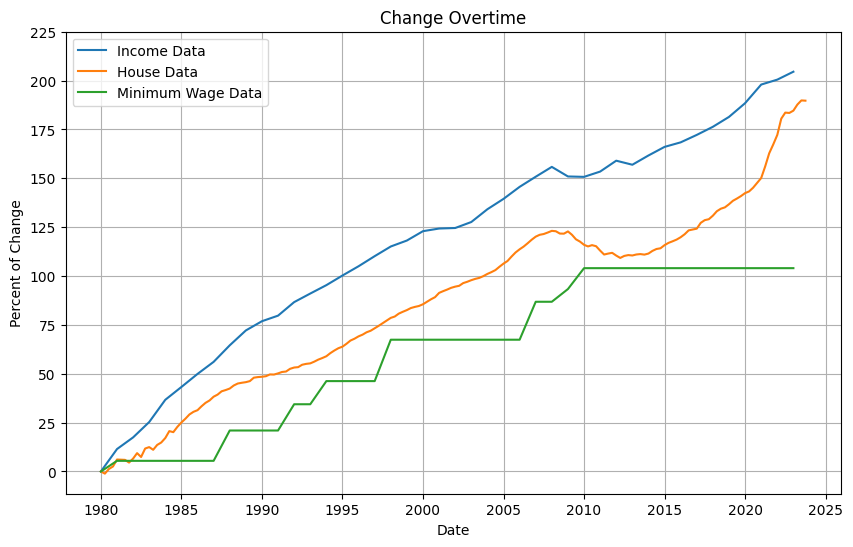

In [86]:
# Creating a visualization for income data
# Assuming df_income, df_house, and df_min_wage are your DataFrames
plt.figure(figsize=(10, 6))

# Plot each DataFrame
plt.plot(income_df['date'], income_df['changed'], label='Income Data')
plt.plot(house_df['date'], (house_df['changed']), label='House Data')
plt.plot(min_wage_df['date'], (min_wage_df['changed']), label='Minimum Wage Data')
plt.title("Change Overtime")
plt.ylabel("Percent of Change")
plt.xlabel("Date")
plt.legend()
plt.yticks(range(0, 250, 25))
plt.grid()
plt.show()
